In [106]:
import pandas as pd
import numpy as np
import multiprocessing

multiprocessing.cpu_count()
import torch
import os
import pandas as pd
from torchvision.io import read_image
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data
import torch
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pyreadr
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn import metrics


#sklearn.metrics.SCORERS.keys()
np.random.seed(42)




In [119]:
x_train = pd.read_pickle("/home/ffc4001/ukbiobankdata/Data/final_X_trainolink")
x_test = pd.read_pickle("/home/ffc4001/ukbiobankdata/Data/final_X_testolink")
y_train = pd.read_pickle("/home/ffc4001/ukbiobankdata/Data/final_Y_trainolink")
y_test = pd.read_pickle("/home/ffc4001/ukbiobankdata/Data/final_Y_testolink")
x_val =pd.read_pickle("/home/ffc4001/ukbiobankdata/Data/final_X_valolink")
Y_val =pd.read_pickle("/home/ffc4001/ukbiobankdata/Data/final_Y_valolink")

In [ ]:
#DROP THE OLINK DATA FOR ABLATION TEST
#x_train = x_train.iloc[:,:543]
#x_test = x_test.iloc[:,:543]

In [124]:
y_val.sum()

31.0

In [122]:
y_test

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
17330    0.0
17331    0.0
17332    0.0
17333    0.0
17334    0.0
Name: Y, Length: 17335, dtype: float64

In [120]:
#Hyperparameter tuning
logistic_search = LogisticRegression(class_weight="balanced")
solvers = ['lbfgs']
c_values = [100, 10, 1.0, 0.1, 0.01]
iter = [400, 500, 600, 700, 1000, 1200,3000,5000]
grid = dict(solver=solvers,C=c_values, max_iter=iter)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logistic_search, param_grid=grid, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Best: 0.962924 using {'C': 100, 'max_iter': 500, 'solver': 'lbfgs'}
0.962924 (0.000778) with: {'C': 100, 'max_iter': 500, 'solver': 'lbfgs'}
0.962018 (0.000759) with: {'C': 10, 'max_iter': 500, 'solver': 'lbfgs'}
0.960730 (0.000901) with: {'C': 1.0, 'max_iter': 500, 'solver': 'lbfgs'}
0.958235 (0.000711) with: {'C': 0.1, 'max_iter': 500, 'solver': 'lbfgs'}
0.947759 (0.001426) with: {'C': 0.01, 'max_iter': 500, 'solver': 'lbfgs'}


/home/ffc4001/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
classifier = LogisticRegression(class_weight="balanced",C=0.01, max_iter=700, solver='lbfgs')
classifier.fit(x_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=700)

In [65]:
x_train

,Inferred_Gender,Age,X1.8495945_T_C_C,X1.20149058_A_G_G,X1.20149560_G_A_A,X1.20150839_A_G_G,X1.20150984_C_G_G,X1.20150998_A_G_G,X1.20151290_C_A_A,X1.20151431_A_G_G,...,WNT9A,WWP2,XCL1,XG,XPNPEP2,XRCC4,YES1,YTHDF3,ZBTB16,ZBTB17
0,0,0.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.3976,-0.1779,0.0035,-0.00010,1.53040,0.14805,0.1138,0.00205,-0.15445,-0.23840
1,0,0.766667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5776,1.4763,1.6084,2.50490,0.20960,0.95065,1.7539,1.60820,2.95895,2.38200
2,0,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.1263,0.4304,-0.5720,-0.11230,-0.79590,0.14650,0.0000,-1.20050,1.00125,0.40830
3,1,0.633333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0088,0.0434,-0.4618,-0.16240,0.57460,0.15085,-0.2558,-0.20285,-0.18495,-0.15640
4,1,0.033333,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,-0.4184,-0.7404,-0.4804,-0.39375,1.16155,0.29955,-2.4493,-1.99725,-0.15660,0.01445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26068,0,0.066667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.6161,1.4456,-0.8182,0.16810,-0.06440,0.57295,1.7542,0.23905,0.67695,0.45420
26069,0,0.433333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.3589,0.3378,-0.1453,0.22240,1.03260,0.07465,0.8922,0.16935,0.42315,0.18060
26070,1,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2424,0.5050,-0.2181,0.01400,-1.21590,0.06865,1.2475,0.77360,0.56455,-0.40670
26071,1,0.466667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0208,0.4288,-0.0295,-0.56130,-2.15160,0.17025,0.7288,0.44765,0.04625,-0.12660


,Inferred_Gender,Age,X1.8495945_T_C_C,X1.20149058_A_G_G,X1.20149560_G_A_A,X1.20150839_A_G_G,X1.20150984_C_G_G,X1.20150998_A_G_G,X1.20151290_C_A_A,X1.20151431_A_G_G,...,WNT9A,WWP2,XCL1,XG,XPNPEP2,XRCC4,YES1,YTHDF3,ZBTB16,ZBTB17
0,0,0.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.3976,-0.1779,0.0035,-0.00010,1.53040,0.14805,0.1138,0.00205,-0.15445,-0.23840
1,0,0.766667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5776,1.4763,1.6084,2.50490,0.20960,0.95065,1.7539,1.60820,2.95895,2.38200
2,0,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.1263,0.4304,-0.5720,-0.11230,-0.79590,0.14650,0.0000,-1.20050,1.00125,0.40830
3,1,0.633333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0088,0.0434,-0.4618,-0.16240,0.57460,0.15085,-0.2558,-0.20285,-0.18495,-0.15640
4,1,0.033333,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,-0.4184,-0.7404,-0.4804,-0.39375,1.16155,0.29955,-2.4493,-1.99725,-0.15660,0.01445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26068,0,0.066667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.6161,1.4456,-0.8182,0.16810,-0.06440,0.57295,1.7542,0.23905,0.67695,0.45420
26069,0,0.433333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.3589,0.3378,-0.1453,0.22240,1.03260,0.07465,0.8922,0.16935,0.42315,0.18060
26070,1,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2424,0.5050,-0.2181,0.01400,-1.21590,0.06865,1.2475,0.77360,0.56455,-0.40670
26071,1,0.466667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0208,0.4288,-0.0295,-0.56130,-2.15160,0.17025,0.7288,0.44765,0.04625,-0.12660


In [92]:
y_pred1 = classifier.predict_proba(x_test)[:,1]
y_pred3 = np.where(y_pred1 > 0.07, 1, 0)

In [93]:

test_acc = sklearn.metrics.roc_auc_score(y_test, y_pred3)
print("The AUC ROC for Test Set is {}".format(test_acc*100))

The AUC ROC for Test Set is 69.7906734779642


In [ ]:
#Tune for accuracy

In [ ]:
y_pred

In [ ]:
y_pred1

TypeError: 'numpy.dtype[float64]' object is not callable

In [ ]:
#y_pred3 = np.where(y_pred1 > 0.07, 1, 0)

In [15]:
#y_pred3

NameError: name 'y_pred3' is not defined

Text(0.5, 36.72222222222221, 'Predicted Values')

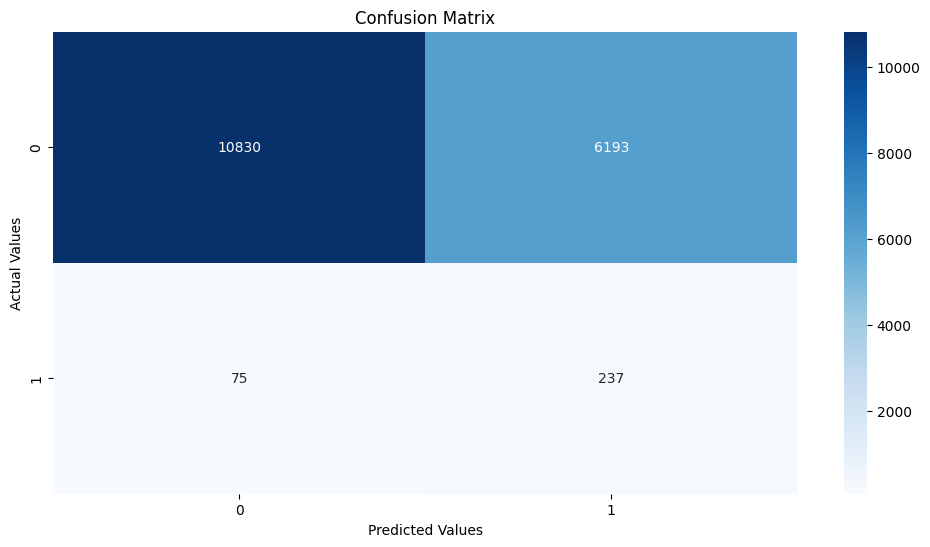

In [94]:
cm=confusion_matrix(y_test,y_pred3)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [95]:
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)
sens = tp / (tp+fn)
specificity

0.6361980849438994

In [96]:
sens

0.7596153846153846

<AxesSubplot: ylabel='Feature'>

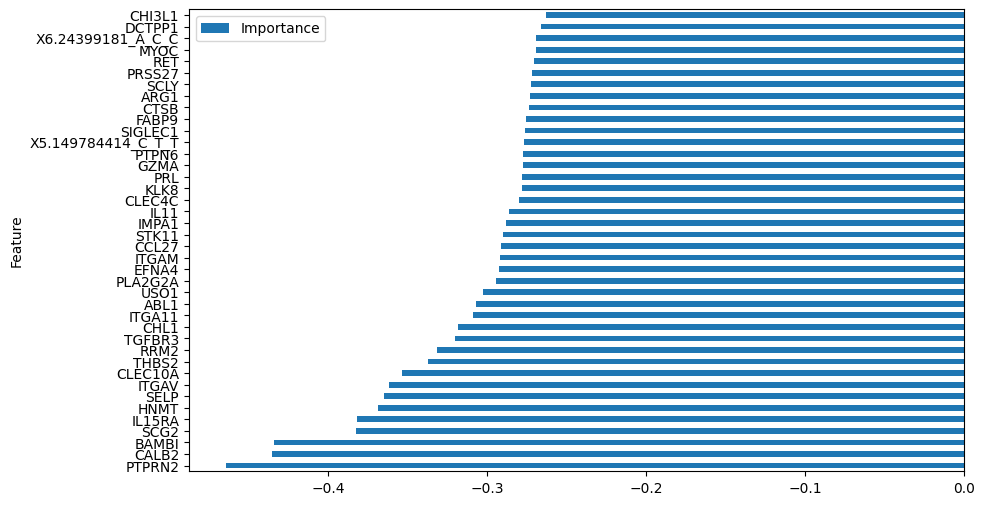

In [26]:
coefficients = classifier.coef_[0]

feature_importance_log = pd.DataFrame({'Feature': x_train.columns, 'Importance': (coefficients)})
feature_importance3 = feature_importance_log.sort_values('Importance', ascending=True)[0:40]
feature_importance3.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

<AxesSubplot: ylabel='Feature'>

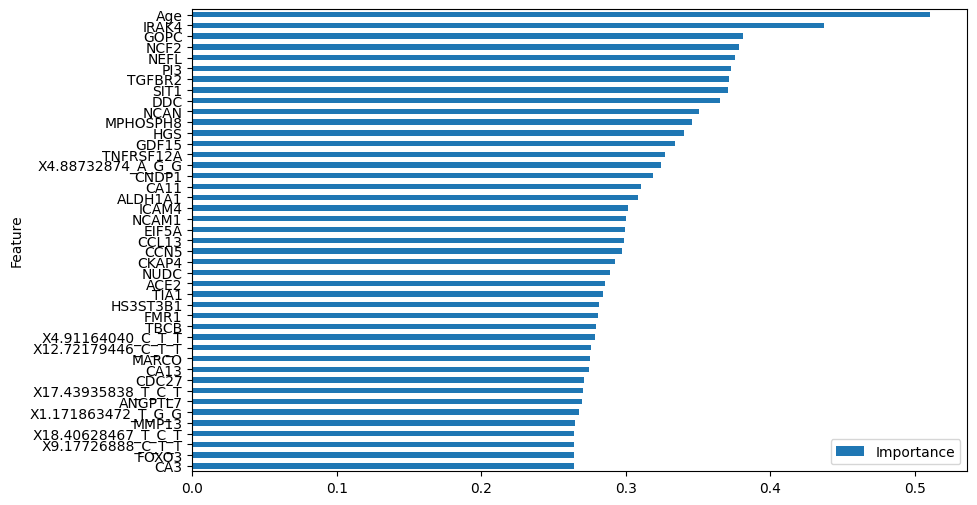

In [30]:
feature_importance_log = pd.DataFrame({'Feature': x_train.columns, 'Importance': (coefficients)})
feature_importance3 = feature_importance_log.sort_values('Importance', ascending=True)[1960:]
feature_importance3.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [89]:
feature_importance[2050:2100]

,Feature,Importance


In [32]:
feature_importance[0:50]

,Feature,Importance


Text(0.5, 1.0, 'ROC Curves')

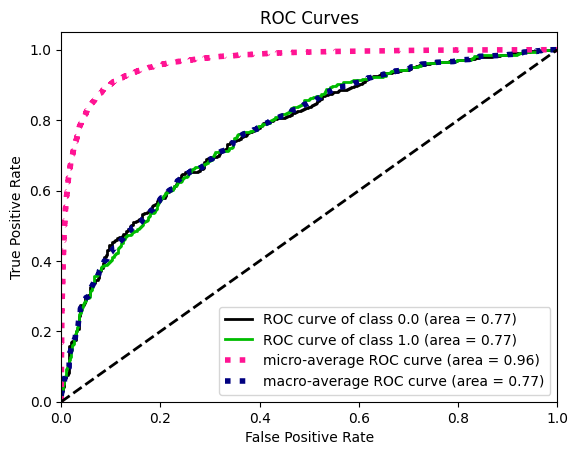

In [99]:
import scikitplot as skplt
plot = skplt.metrics.plot_roc(y_test, classifier.predict_proba(x_test))
plt.title("ROC Curves")


In [62]:
x_test

,Inferred_Gender,Age,X1.8495945_T_C_C,X1.20149058_A_G_G,X1.20149560_G_A_A,X1.20150839_A_G_G,X1.20150984_C_G_G,X1.20150998_A_G_G,X1.20151290_C_A_A,X1.20151431_A_G_G,...,WNT9A,WWP2,XCL1,XG,XPNPEP2,XRCC4,YES1,YTHDF3,ZBTB16,ZBTB17
0,1.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.094900,-0.831900,-0.516900,-0.573600,0.268100,-0.749450,-0.671400,-1.665050,0.273450,0.186500
1,1.0,0.433333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030200,-0.941000,0.168950,-0.325100,-0.087500,-0.223350,-1.727000,-0.868900,-0.869350,-0.580200
2,1.0,0.966667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.426500,0.226500,0.279500,-0.274750,0.075850,-0.379350,0.680900,0.469750,0.652700,0.177450
3,1.0,0.633333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.019000,-0.362600,0.006350,0.019500,-0.597800,-0.114450,-0.660200,1.079400,-0.198450,0.158300
4,1.0,0.866667,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.143100,-0.123400,0.365900,-0.592600,0.144900,-0.445850,-0.785700,0.119300,-0.192750,-0.193800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1.0,0.527971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.855100,0.825800,0.128267,0.189433,1.032400,0.689367,3.082200,0.859967,2.590833,0.848800
125,1.0,0.686775,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.590967,0.475700,0.939667,0.067967,-0.063633,0.269567,1.711067,0.040833,1.966833,1.100967
126,0.0,0.559887,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.347567,0.637300,0.744033,1.270333,0.478600,0.255267,2.766733,0.890167,1.876967,0.408767
127,1.0,0.637956,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.993467,0.690533,1.868833,-0.125433,1.377600,0.309133,2.269900,1.415533,1.465867,0.705700


In [61]:
x_val

,Inferred_Gender,Age,X1.108176287_C_T_T,X1.151115007_G_A_A,X1.154837939_A_G_G,X1.155026114_C_T_C,X1.155033317_T_C_T,X1.155033918_C_T_T,X1.155034632_C_G_G,X1.155044197_T_G_G,...,VAMP5,VASN,VCAM1,VIM,VSIR,VSTM2L,VWF,WASF1,XG,ZBTB17
0,0.0,0.735751,1,0,0,0,0,0,0,0,...,0.805233,0.198433,0.601533,0.299467,0.541500,0.283500,0.060800,0.159700,0.774767,0.596400
1,1.0,0.549998,1,1,0,0,1,0,1,0,...,0.628167,0.562467,0.261000,0.721550,0.583817,0.018650,0.938050,0.423933,0.359683,0.608200
2,0.0,0.979271,0,0,0,0,0,0,1,0,...,0.953733,-0.216733,0.364600,0.256433,0.590433,-0.022533,1.032367,1.383467,0.566200,0.934900
3,0.0,0.929645,0,0,0,0,0,0,1,0,...,1.122450,0.252633,0.890500,0.226817,0.540517,0.456033,-0.006050,-0.003683,1.038300,1.141150
4,1.0,0.512735,2,0,0,0,1,1,1,0,...,0.770133,0.474100,0.725867,0.428967,0.566167,0.290500,0.559200,0.648200,0.796200,1.426967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1.0,0.527971,1,0,0,0,1,1,1,0,...,0.955833,0.322500,0.263633,0.278267,0.533367,0.088067,-0.625867,2.077500,0.189433,0.848800
125,1.0,0.686775,0,0,0,1,1,0,0,1,...,1.656733,0.255433,0.974633,-0.445533,0.756500,0.657800,-0.321600,1.078367,0.067967,1.100967
126,0.0,0.559887,2,0,0,0,0,2,2,0,...,2.133367,0.415867,0.313600,-0.149933,0.765367,-0.095700,-0.046800,1.695033,1.270333,0.408767
127,1.0,0.637956,1,0,0,1,0,1,1,0,...,1.943167,0.180067,0.587900,0.000867,0.944267,0.671400,-0.052633,1.873567,-0.125433,0.705700


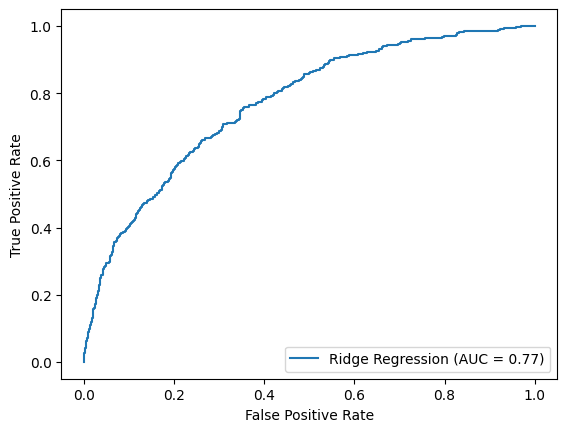

In [102]:
#roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Ridge Regression')
display.plot()
plt.show()

In [103]:
roc_auc

0.7698376028209195

<AxesSubplot: ylabel='Feature'>

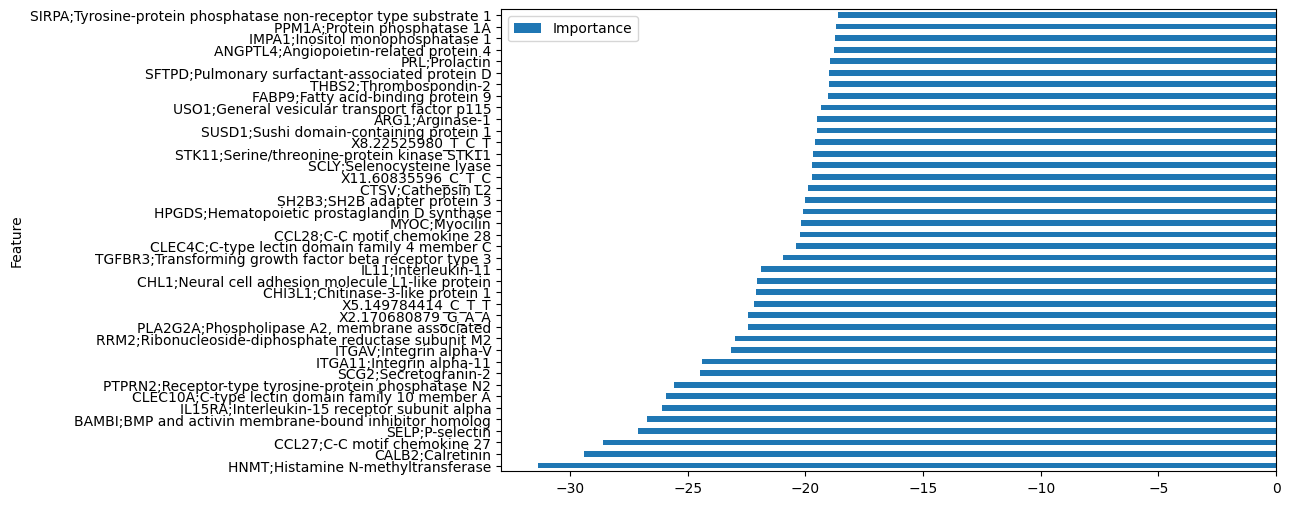

In [370]:
# coefficients1 = svm1.coef_[0]

# feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': (coefficients1)})
# feature_importance1 = feature_importance.sort_values('Importance', ascending=True)[0:40]
# feature_importance1.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

<AxesSubplot: ylabel='Feature'>

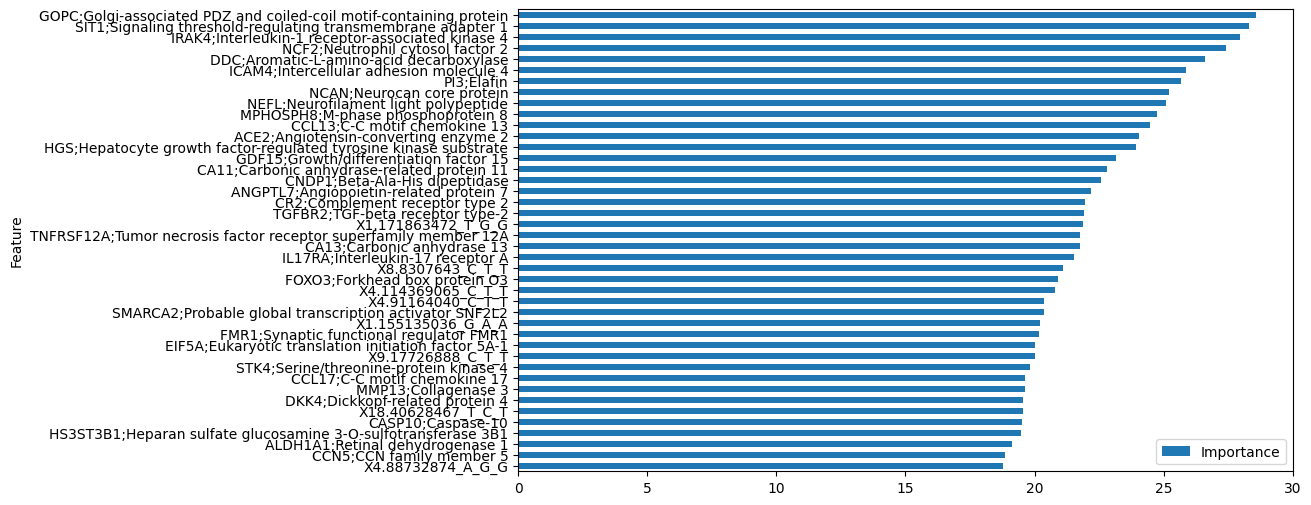

In [367]:
# feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': (coefficients1)})
# feature_importance2 = feature_importance.sort_values('Importance', ascending=True)[2058:2100]
# feature_importance2.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [379]:
# svm_neg = feature_importance.sort_values('Importance', ascending=True)[0:100]

In [380]:
# svm_pos = feature_importance.sort_values('Importance', ascending=True)[2000:2100]

In [381]:
# svm_pos

,Feature,Importance
1135,ESM1;Endothelial cell-specific molecule 1,15.317742
635,X22.39758541_A_G_A,15.501832
659,ADAMTS8;A disintegrin and metalloproteinase wi...,15.556566
1432,KLK6;Kallikrein-6,15.567569
1869,SIAE;Sialate O-acetylesterase,15.605105
...,...,...
1052,DDC;Aromatic-L-amino-acid decarboxylase,26.595370
1585,NCF2;Neutrophil cytosol factor 2,27.398360
1393,IRAK4;Interleukin-1 receptor-associated kinase 4,27.947399
1881,SIT1;Signaling threshold-regulating transmembr...,28.310746


In [36]:
log_neg = feature_importance_log.sort_values('Importance', ascending=True)[0:100]

In [37]:
log_pos = feature_importance_log.sort_values('Importance', ascending=True)[1950:]

In [384]:
log_neg

,Feature,Importance
792,CALB2;Calretinin,-0.427770
750,BAMBI;BMP and activin membrane-bound inhibitor...,-0.424596
1766,PTPRN2;Receptor-type tyrosine-protein phosphat...,-0.400865
1400,ITGAV;Integrin alpha-V,-0.394691
1289,HNMT;Histamine N-methyltransferase,-0.382599
...,...,...
1865,SFTPD;Pulmonary surfactant-associated protein D,-0.203918
808,CCL11;Eotaxin,-0.203682
1162,FCRL2;Fc receptor-like protein 2,-0.203460
1042,DBI;Acyl-CoA-binding protein,-0.202076


In [ ]:
#COMBINED FEATURES

In [388]:
#neg = list(set(svm_neg.Feature) & set(log_neg.Feature))

In [389]:
#neg

['PTPRN2;Receptor-type tyrosine-protein phosphatase N2',
 'EFNA4;Ephrin-A4',
 'CALB2;Calretinin',
 'FABP9;Fatty acid-binding protein 9',
 'STK11;Serine/threonine-protein kinase STK11',
 'KYAT1;Kynurenine--oxoglutarate transaminase 1',
 'THBS2;Thrombospondin-2',
 'AGRN;Agrin',
 'X5.149784414_C_T_T',
 'X17.40741013_T_C_C',
 'BOC;Brother of CDO',
 'RET;Proto-oncogene tyrosine-protein kinase receptor Ret',
 'PLA2G2A;Phospholipase A2, membrane associated',
 'MYOC;Myocilin',
 'X11.60835596_C_T_C',
 'LEFTY2;Left-right determination factor 2',
 'PRSS27;Serine protease 27',
 'SELP;P-selectin',
 'IL11;Interleukin-11',
 'HNMT;Histamine N-methyltransferase',
 'SH2B3;SH2B adapter protein 3',
 'CXCL8;Interleukin-8',
 'CHI3L1;Chitinase-3-like protein 1',
 'RWDD1;RWD domain-containing protein 1',
 'CXCL13;C-X-C motif chemokine 13',
 'SCG3;Secretogranin-3',
 'X4.103188709_C_T_T',
 'IL13RA1;Interleukin-13 receptor subunit alpha-1',
 'NBN;Nibrin',
 'SIGLEC1;Sialoadhesin',
 'KRT14;Keratin, type I cytoskel

In [390]:
#pos = list(set(svm_pos.Feature) & set(log_pos.Feature))

In [391]:
#pos

['X8.10999583_C_T_T',
 'ACE2;Angiotensin-converting enzyme 2',
 'APOH;Beta-2-glycoprotein 1',
 'COPE;Coatomer subunit epsilon',
 'NCAN;Neurocan core protein',
 'IL18;Interleukin-18',
 'FMR1;Synaptic functional regulator FMR1',
 'NUDC;Nuclear migration protein nudC',
 'HGS;Hepatocyte growth factor-regulated tyrosine kinase substrate',
 'BTN3A2;Butyrophilin subfamily 3 member A2',
 'PGF;Placenta growth factor',
 'ANGPTL7;Angiopoietin-related protein 7',
 'SMARCA2;Probable global transcription activator SNF2L2',
 'X16.89986117_C_T_T',
 'TBCB;Tubulin-folding cofactor B',
 'GOPC;Golgi-associated PDZ and coiled-coil motif-containing protein',
 'SIT1;Signaling threshold-regulating transmembrane adapter 1',
 'THBS4;Thrombospondin-4',
 'IGFBP3;Insulin-like growth factor-binding protein 3',
 'DPEP1;Dipeptidase 1',
 'CR2;Complement receptor type 2',
 'PI3;Elafin',
 'ICAM4;Intercellular adhesion molecule 4',
 'CASP10;Caspase-10',
 'MPHOSPH8;M-phase phosphoprotein 8',
 'CCL13;C-C motif chemokine 13

In [398]:
shap_top = pd.read_csv("shap_top.csv")

In [399]:
shap_top

,Unnamed: 0,col_name,feature_importance_vals
0,1,Age,0.241191
1,1653,PAEP;Glycodelin,0.219273
2,1571,MUC16;Mucin-16,0.175250
3,920,CGA;Glycoprotein hormones alpha chain,0.117785
4,1711,PNLIPRP2;Pancreatic lipase-related protein 2,0.117160
...,...,...,...
195,800,CASP10;Caspase-10,0.047450
196,1628,NTF4;Neurotrophin-4,0.047198
197,1830,SCG2;Secretogranin-2,0.046928
198,1897,SMARCA2;Probable global transcription activato...,0.046813


In [400]:
pos1 = list(set(svm_pos.Feature) & set(log_pos.Feature) & set(shap_top.col_name))

In [401]:
pos1

['FOXO3;Forkhead box protein O3',
 'ACE2;Angiotensin-converting enzyme 2',
 'CCL13;C-C motif chemokine 13',
 'X2.31832807_T_C_T',
 'NCF2;Neutrophil cytosol factor 2',
 'TNFRSF12A;Tumor necrosis factor receptor superfamily member 12A',
 'TIA1;Nucleolysin TIA-1 isoform p40',
 'DKK4;Dickkopf-related protein 4',
 'NCAM1;Neural cell adhesion molecule 1',
 'CPA2;Carboxypeptidase A2',
 'NEFL;Neurofilament light polypeptide',
 'IL17RA;Interleukin-17 receptor A',
 'ANGPTL7;Angiopoietin-related protein 7',
 'SMARCA2;Probable global transcription activator SNF2L2',
 'CD276;CD276 antigen',
 'CCN5;CCN family member 5',
 'CRACR2A;EF-hand calcium-binding domain-containing protein 4B',
 'CA3;Carbonic anhydrase 3',
 'DDC;Aromatic-L-amino-acid decarboxylase',
 'GOPC;Golgi-associated PDZ and coiled-coil motif-containing protein',
 'THBS4;Thrombospondin-4',
 'IRAK4;Interleukin-1 receptor-associated kinase 4',
 'GDF15;Growth/differentiation factor 15',
 'X9.17726888_C_T_T',
 'PADI2;Protein-arginine deimina

In [402]:
neg1 = list(set(svm_neg.Feature) & set(log_neg.Feature) & set(shap_top.col_name))

In [403]:
neg1

['CCL27;C-C motif chemokine 27',
 'CHI3L1;Chitinase-3-like protein 1',
 'SFTPD;Pulmonary surfactant-associated protein D',
 'SIRPA;Tyrosine-protein phosphatase non-receptor type substrate 1',
 'SCLY;Selenocysteine lyase',
 'SCG2;Secretogranin-2',
 'CALB2;Calretinin',
 'PAEP;Glycodelin',
 'CXCL13;C-X-C motif chemokine 13',
 'SCG3;Secretogranin-3',
 'IMPA1;Inositol monophosphatase 1',
 'FABP9;Fatty acid-binding protein 9',
 'X20.2828596_A_G_G',
 'X2.170680879_G_A_A',
 'ITGAM;Integrin alpha-M',
 'ANGPTL4;Angiopoietin-related protein 4',
 'X5.149784414_C_T_T',
 'X7.129663496_C_T_T',
 'CCL28;C-C motif chemokine 28',
 'NMNAT1;Nicotinamide/nicotinic acid mononucleotide adenylyltransferase 1',
 'X17.40741013_T_C_C',
 'X2.241652703_T_C_C',
 'PLA2G2A;Phospholipase A2, membrane associated',
 'X7.23430418_C_T_T',
 'MYOC;Myocilin',
 'X11.60835596_C_T_C',
 'LEFTY2;Left-right determination factor 2',
 'PRL;Prolactin',
 'HPGDS;Hematopoietic prostaglandin D synthase',
 'ITGB7;Integrin beta-7',
 'IL11;I

In [ ]:
#Validation set

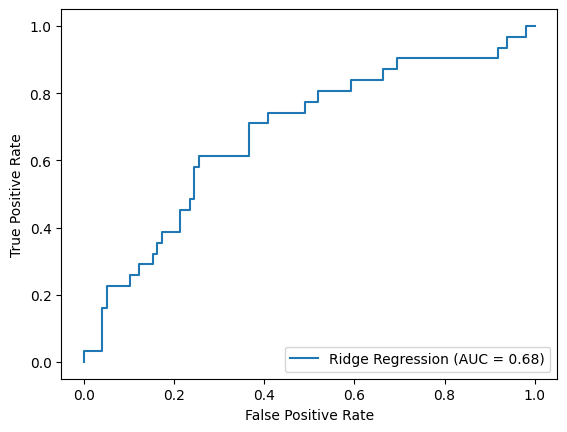

In [115]:
#roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_val, classifier.predict_proba(x_val)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Ridge Regression')
display.plot()
plt.show()

In [ ]:
#Sens

In [ ]:
#Spec